# Import standard libraries

In [495]:
import tensorflow as tf
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Read data and do some cleaning

In [496]:
df = pd.read_csv('Historical Product Demand.csv',parse_dates=['Date'])

In [497]:
df.head(5)

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012-07-27,100
1,Product_0979,Whse_J,Category_028,2012-01-19,500
2,Product_0979,Whse_J,Category_028,2012-02-03,500
3,Product_0979,Whse_J,Category_028,2012-02-09,500
4,Product_0979,Whse_J,Category_028,2012-03-02,500


In [498]:
df.dtypes #check for types

Product_Code                object
Warehouse                   object
Product_Category            object
Date                datetime64[ns]
Order_Demand                object
dtype: object

In [499]:
df.isnull().any() #check for missing values in each column

Product_Code        False
Warehouse           False
Product_Category    False
Date                 True
Order_Demand        False
dtype: bool

In [500]:
#check the number of missing values in date column
print(df['Date'].isna().sum())
print(df['Date'].count())

11239
1037336


In [501]:
print(df['Date'].isna().sum()/df['Date'].count()) 

0.010834483715980165


In [502]:
# remove data with missing date values and reset index
df.dropna(inplace = True)
df.reset_index(drop = True,inplace=True)

In [503]:
df['Order_Demand'].values[np.random.randint(1,len(df),500)]

array(['1000 ', '100 ', '90 ', '1000 ', '5 ', '1000 ', '3000 ', '120 ',
       '40 ', '3 ', '100 ', '300 ', '5000 ', '500 ', '1000 ', '3000 ',
       '50 ', '500 ', '1000 ', '3 ', '100 ', '200 ', '80000 ', '5000 ',
       '1 ', '12 ', '8 ', '100 ', '10 ', '500 ', '900 ', '1000 ', '6 ',
       '1 ', '100 ', '100 ', '20000 ', '1500 ', '400 ', '1000 ', '100 ',
       '200 ', '2000 ', '4 ', '20 ', '1000 ', '10 ', '10 ', '50 ', '100 ',
       '500 ', '100 ', '30000 ', '5000 ', '2500 ', '6 ', '50 ', '3000 ',
       '10000 ', '1000 ', '10 ', '1000 ', '3 ', '1 ', '5000 ', '30000 ',
       '25 ', '10000 ', '0 ', '1000 ', '4000 ', '2000 ', '1 ', '30000 ',
       '100 ', '200 ', '2000 ', '4000 ', '50 ', '9000 ', '1 ', '5000 ',
       '25 ', '200 ', '1000 ', '500 ', '10 ', '500 ', '1000 ', '0 ',
       '5000 ', '10 ', '152 ', '2000 ', '5000 ', '900 ', '400 ', '600 ',
       '5000 ', '2000 ', '30 ', '1000 ', '100 ', '3000 ', '33 ', '1 ',
       '500 ', '10000 ', '1 ', '25000 ', '200 ', '2 ', '3000 

In [504]:
#get rid of brackets in some rows of order demand column and change data type to int
df['Order_Demand'] = df['Order_Demand'].str.replace('(',"")
df['Order_Demand'] = df['Order_Demand'].str.replace(')',"")
df['Order_Demand'] = df['Order_Demand'].astype('int64')

In [505]:
df['Date'].min() , df['Date'].max()

(Timestamp('2011-01-08 00:00:00'), Timestamp('2017-01-09 00:00:00'))

In [506]:
# cut data before 2012 and after 2016 and sort by date
df = df[(df['Date']>='2012-01-01') & (df['Date']<='2016-12-31')].sort_values('Date', ascending=True)

# Data analysis

In [507]:
#look at cumulative demand as time series by  resampling with 2 weeks interval for each warehouse.
cum = df.groupby(by=["Date","Warehouse"]).sum().reset_index()
cum.set_index('Date', inplace=True)

cum = (cum
      .groupby(['Warehouse',pd.Grouper(freq='2W')])['Order_Demand']
      .mean()).reset_index()
print(cum)

    Warehouse       Date   Order_Demand
0      Whse_A 2012-01-15   68705.416667
1      Whse_A 2012-01-29   69991.750000
2      Whse_A 2012-02-12   94226.615385
3      Whse_A 2012-02-26  109462.545455
4      Whse_A 2012-03-11   98174.750000
..        ...        ...            ...
520    Whse_S 2016-11-13  340339.916667
521    Whse_S 2016-11-27  398093.461538
522    Whse_S 2016-12-11  567750.727273
523    Whse_S 2016-12-25  250150.909091
524    Whse_S 2017-01-08  484343.400000

[525 rows x 3 columns]


Text(0, 0.5, 'cumulative demand')

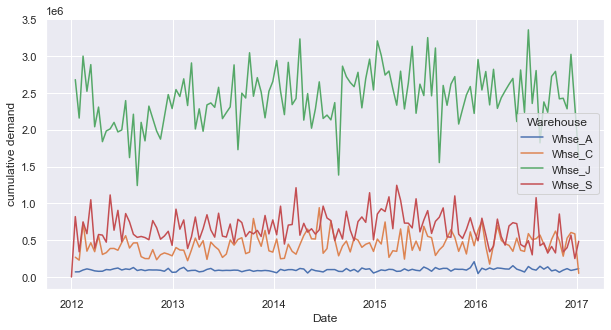

In [508]:
#plot resampled cumulative demand for each warehouse
sns.lineplot(data = cum, x="Date", y="Order_Demand",hue = 'Warehouse')
sns.set(rc = {'figure.figsize':(20,5)})
plt.ylabel('cumulative demand')

In [509]:
#Demand in Whse_J is highest, let's further analyze it.
print(df)

        Product_Code Warehouse Product_Category       Date  Order_Demand
130869  Product_2166    Whse_S     Category_024 2012-01-01             2
196927  Product_0614    Whse_S     Category_001 2012-01-02             3
200086  Product_1281    Whse_S     Category_019 2012-01-02         14000
200085  Product_1355    Whse_S     Category_019 2012-01-02          5000
77312   Product_2169    Whse_S     Category_024 2012-01-02            55
...              ...       ...              ...        ...           ...
984353  Product_0200    Whse_A     Category_007 2016-12-30            20
970804  Product_1388    Whse_A     Category_019 2016-12-30           100
988674  Product_1341    Whse_S     Category_019 2016-12-30         15000
970805  Product_1513    Whse_A     Category_019 2016-12-30           100
988675  Product_1431    Whse_S     Category_019 2016-12-30         15000

[1036643 rows x 5 columns]


In [510]:
wh_j = df[df['Warehouse'] == 'Whse_J'].reset_index(drop = True)
wh_j = wh_j.drop('Warehouse', 1)

In [511]:
print((wh_j))

        Product_Code Product_Category       Date  Order_Demand
0       Product_1056     Category_032 2012-01-04           120
1       Product_0901     Category_023 2012-01-05            50
2       Product_1969     Category_005 2012-01-05          1000
3       Product_1463     Category_019 2012-01-05          2000
4       Product_1387     Category_019 2012-01-05          2000
...              ...              ...        ...           ...
764210  Product_0373     Category_030 2016-12-29           300
764211  Product_1463     Category_019 2016-12-29           300
764212  Product_1453     Category_019 2016-12-29         10000
764213  Product_1923     Category_001 2016-12-29             3
764214  Product_1661     Category_026 2016-12-29            12

[764215 rows x 4 columns]


In [512]:
#look at cumulative demand as time series by  resampling with 2 weeks interval for each warehouse.
wh_j_res = wh_j.groupby(by=["Date","Product_Category"]).sum().reset_index()
wh_j_res.set_index('Date', inplace=True)

wh_j_res = (wh_j_res
      .groupby(['Product_Category',pd.Grouper(freq='2W')])['Order_Demand']
      .mean()).reset_index()
print(wh_j_res)

     Product_Category       Date  Order_Demand
0        Category_001 2012-01-08   1273.500000
1        Category_001 2012-01-22    900.500000
2        Category_001 2012-02-05   1319.800000
3        Category_001 2012-02-19   1007.200000
4        Category_001 2012-03-04   1347.500000
...               ...        ...           ...
3099     Category_033 2016-11-06  67500.000000
3100     Category_033 2016-11-20  57500.000000
3101     Category_033 2016-12-04  65714.285714
3102     Category_033 2016-12-18  62500.000000
3103     Category_033 2017-01-01  72500.000000

[3104 rows x 3 columns]


Text(0.5, 1.0, 'Warehouse J demand by category')

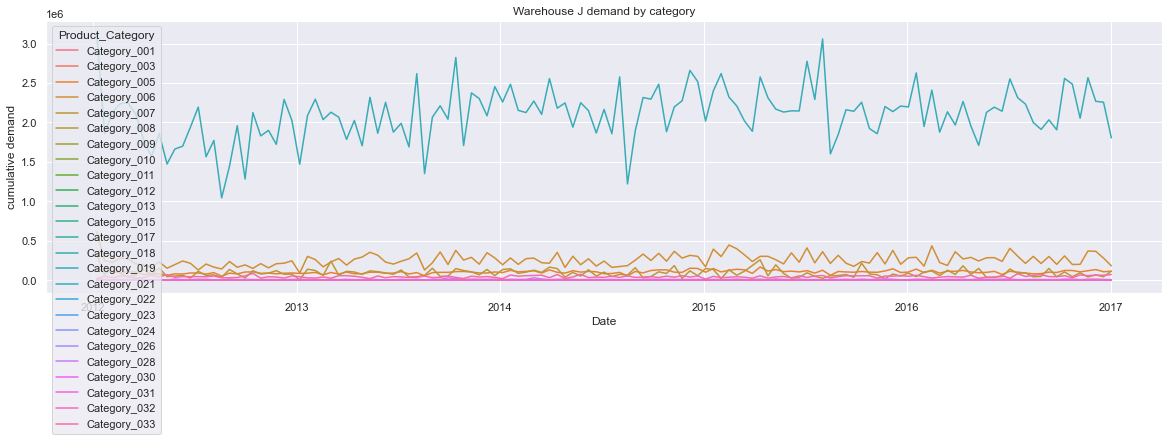

In [513]:
#plot resampled cumulative demand for warehouse j by category
sns.lineplot(data = wh_j_res, x="Date", y="Order_Demand",hue = 'Product_Category')
sns.set(rc = {'figure.figsize':(20,5)})
plt.ylabel('cumulative demand')
plt.title('Warehouse J demand by category')

In [514]:
#One category dominates the total demand. Let's find out the id of that category
wh_j_res.iloc[wh_j_res['Order_Demand'].idxmax()][0]

'Category_019'

# Forecast for warehouse j 

In [515]:
wh_j_res = wh_j.groupby(by=["Date","Product_Category"]).sum().reset_index()
wh_j_res.set_index('Date', inplace=True)

wh_j_res = (wh_j_res
      .groupby([pd.Grouper(freq='2W')])['Order_Demand']
      .mean()).reset_index()
print(wh_j_res)

          Date   Order_Demand
0   2012-01-08  224584.342105
1   2012-01-22  156292.352201
2   2012-02-05  152305.954545
3   2012-02-19  154831.374302
4   2012-03-04  148929.835165
..         ...            ...
126 2016-11-06  135677.088235
127 2016-11-20  167972.539267
128 2016-12-04  173527.418079
129 2016-12-18  145541.936585
130 2017-01-01  140268.857143

[131 rows x 2 columns]


Text(0.5, 1.0, 'Warehouse J cumulative demand')

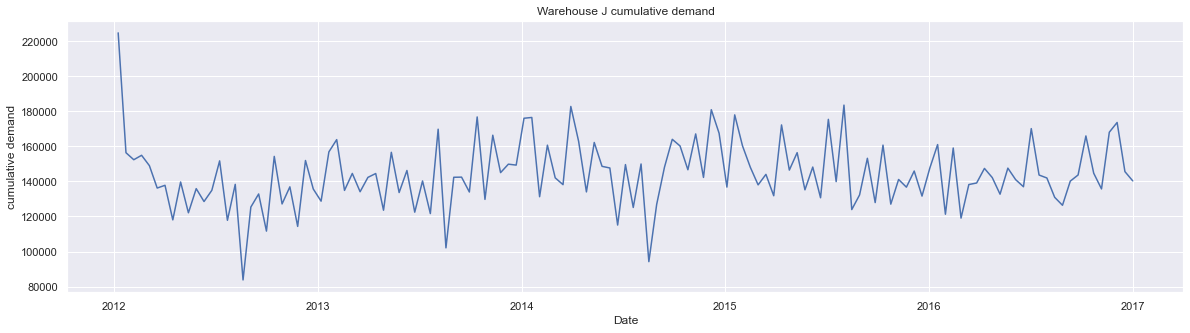

In [516]:
sns.lineplot(data = wh_j_res, x="Date", y="Order_Demand")
sns.set(rc = {'figure.figsize':(20,5)})
plt.ylabel('cumulative demand')
plt.title('Warehouse J cumulative demand')

In [517]:
wh_j_res = wh_j_res.set_index('Date')
print(wh_j_res)

             Order_Demand
Date                     
2012-01-08  224584.342105
2012-01-22  156292.352201
2012-02-05  152305.954545
2012-02-19  154831.374302
2012-03-04  148929.835165
...                   ...
2016-11-06  135677.088235
2016-11-20  167972.539267
2016-12-04  173527.418079
2016-12-18  145541.936585
2017-01-01  140268.857143

[131 rows x 1 columns]


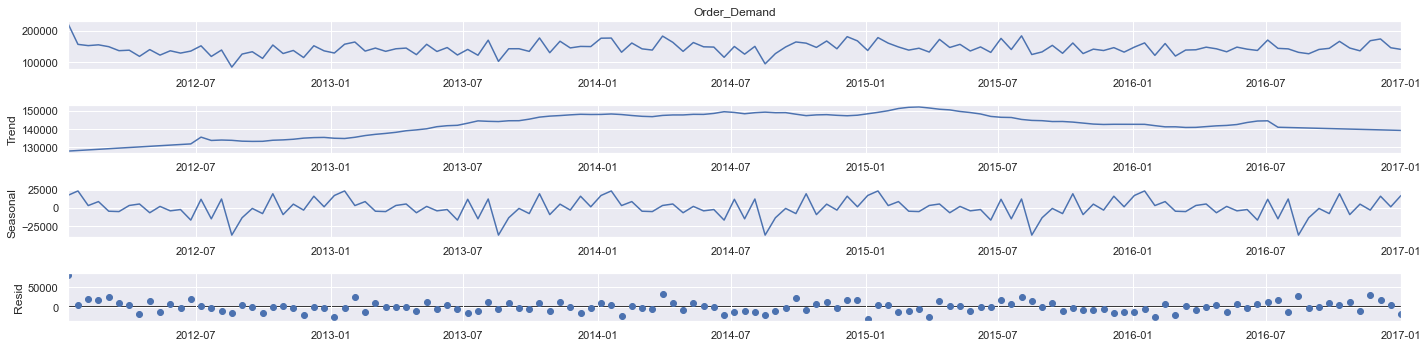

In [518]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(wh_j_res['Order_Demand'], model='additive', extrapolate_trend='freq',period= 26)
fig = decomposition.plot()
plt.show()

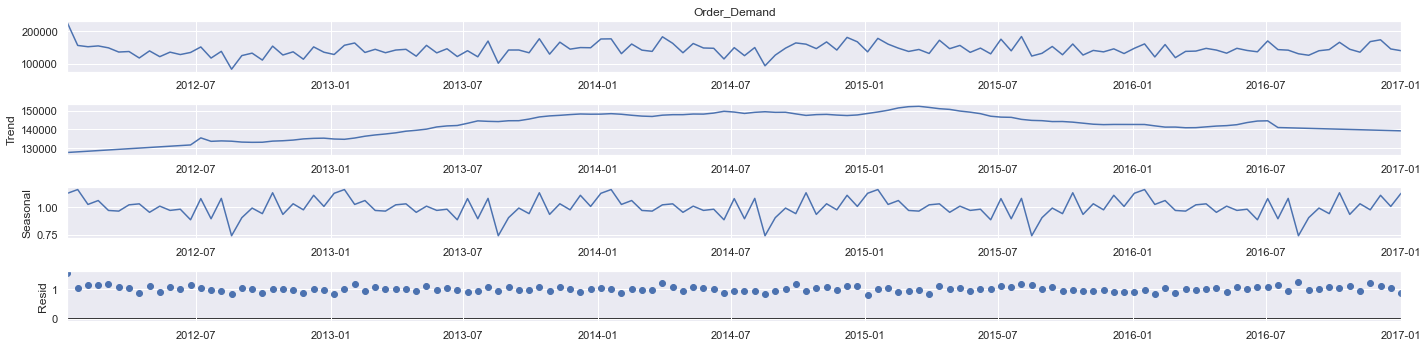

In [519]:
decomposition = sm.tsa.seasonal_decompose(wh_j_res['Order_Demand'], model='multiplicative', extrapolate_trend='freq',period= 26)
fig = decomposition.plot()
plt.show()

In [520]:
#check if series is stationary
from statsmodels.tsa.stattools import adfuller
ad_fuller_result = adfuller(wh_j_res['Order_Demand'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -6.451617804202246
p-value: 1.5185301040184494e-08


# Prediction with Sarimax

In [521]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [522]:
# define model
model = SARIMAX(wh_j_res, order=(0,1,2), seasonal_order=(0,1,2,26))
# fit model
model_fit = model.fit()
#forecast
yhat = model_fit.predict(start=5, end=len(wh_j_res)+10)

C:\Users\oqurb\anaconda3\envs\ml_course_tf\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 2W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\oqurb\anaconda3\envs\ml_course_tf\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 2W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\oqurb\anaconda3\envs\ml_course_tf\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [523]:
print(type(yhat))

<class 'pandas.core.series.Series'>


<AxesSubplot:title={'center':'Warehouse J demand by category'}, xlabel='Date', ylabel='cumulative demand'>

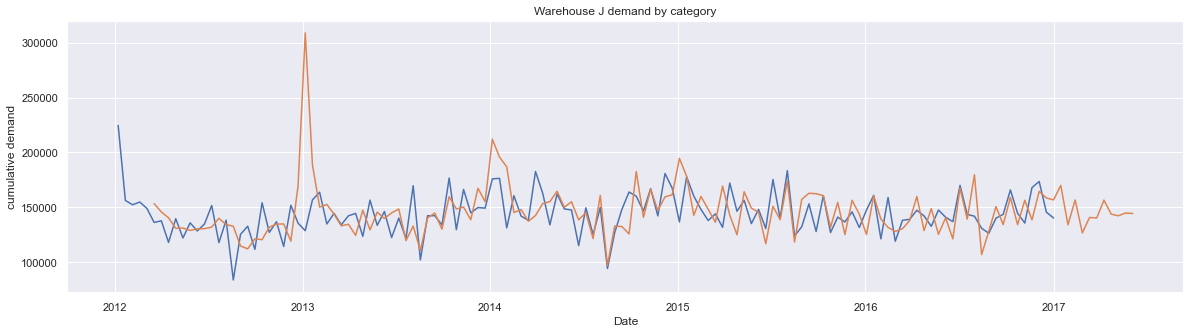

In [524]:
sns.lineplot(data = wh_j_res, x="Date", y="Order_Demand")
sns.set(rc = {'figure.figsize':(10,5)})
plt.ylabel('cumulative demand')
plt.title('Warehouse J demand by category')
sns.lineplot(data =yhat)

# Prediction with Prophet 

In [527]:
print(wh_j_res)
from prophet import Prophet 
model = Prophet()
wh_j_res = wh_j_res.reset_index('Date')
wh_j_res.rename(columns={'Date': 'ds', 'Order_Demand': 'y'}, inplace=True)
model.fit(wh_j_res)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


                        y
Date                     
2012-01-08  224584.342105
2012-01-22  156292.352201
2012-02-05  152305.954545
2012-02-19  154831.374302
2012-03-04  148929.835165
...                   ...
2016-11-06  135677.088235
2016-11-20  167972.539267
2016-12-04  173527.418079
2016-12-18  145541.936585
2017-01-01  140268.857143

[131 rows x 1 columns]


In [528]:
time = wh_j_res.drop('y',1)
print(time)
forecast = model.predict(time)

            ds
0   2012-01-08
1   2012-01-22
2   2012-02-05
3   2012-02-19
4   2012-03-04
..         ...
126 2016-11-06
127 2016-11-20
128 2016-12-04
129 2016-12-18
130 2017-01-01

[131 rows x 1 columns]


In [529]:
print(forecast['yhat'])

0      158572.183447
1      157710.812322
2      144884.293987
3      141940.105894
4      137082.388002
           ...      
126    140379.064014
127    152982.038216
128    158005.242129
129    148379.326191
130    160459.412307
Name: yhat, Length: 131, dtype: float64


<AxesSubplot:xlabel='ds', ylabel='yhat'>

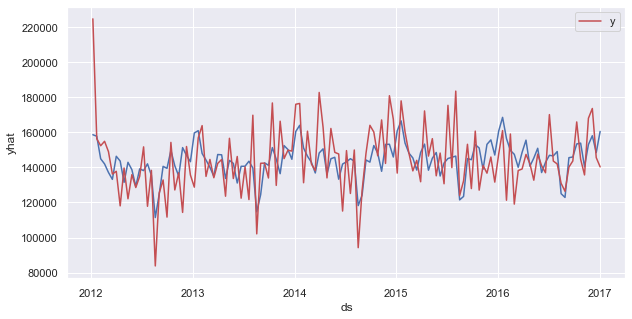

In [531]:
sns.lineplot(data = forecast, x="ds", y="yhat")
wh_j_res = wh_j_res.set_index('ds')
sns.lineplot(data = wh_j_res,palette=['r'])
#print(wh_j_res)